In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [5]:
def ax_pattern(G, pos, susceptible, infected, removed, ax):
    ax.clear()
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible, node_size=200, node_color="blue", ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=infected, node_size=200, node_color="red", ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=removed, node_size=200, node_color="gray", ax=ax)
    nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos)

def sir_gif(G, infected, p=0.7, max_iter=100, seed=1):
    random.seed(a = seed)
    pos = nx.kamada_kawai_layout(G)
    nodes = set(G.nodes())
    
    susceptible = nodes.difference(infected)
    removed = set()
    
    fig, ax = plt.subplots()
    
    def animate(i, lst, ax): 
        G = lst[0]
        pos = lst[1]
        susceptible = lst[2]
        infected = lst[3]
        removed = lst[4]
        
        if i==0:
            ax_pattern(G, pos, susceptible, infected, removed, ax)
        elif len(infected) == 0:
            pass
        else:
            new_removed = removed.union(infected)
            new_susceptible = susceptible
            new_infected = set()
            
            for node in infected:
                for child in G.neighbors(node):
                    if child in new_susceptible:
                        toss_a_coin = random.random()
                        if toss_a_coin < p:
                            new_infected.add(child)
                            new_susceptible.remove(child)
            
            
            lst[2] = new_susceptible
            lst[3] = new_infected
            lst[4] = new_removed
            ax_pattern(G, pos, new_susceptible, new_infected, new_removed, ax)
            
            
    life_animation = animation.FuncAnimation(fig, 
                                             animate, 
                                             fargs=([G, pos, susceptible, infected, removed], ax),
                                             save_count=max_iter,
                                             interval = 1000,
                                             repeat = False)

    life_animation.save('SIR.gif',
                        writer='imagemagick',
                        fps=1,
                        dpi=300)
    

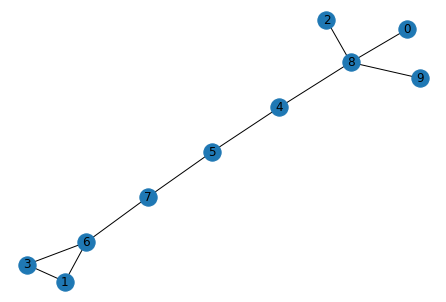

In [6]:
G = nx.generators.random_graphs.gnm_random_graph(10, 10, seed=1447)
nx.draw(G, with_labels=True)

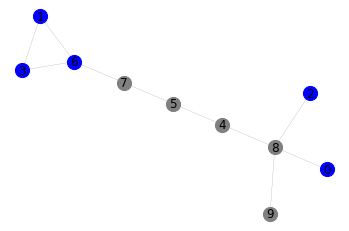

In [7]:
infected = [8]
sir_gif(G, infected, p=0.5, max_iter=7)